In [1]:
import pandas as pd
import ast
import re
import time
import numpy as np

from konlpy.tag import Kkma, Okt, Hannanum
import gensim
from eunjeon import Mecab

C:\Users\limaries30\.conda\envs\python3.6\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
class sampling_by_length:
    def __init__(self,sent,n=10):
        self.sent=sent
        self.len_sent=n
    
#     def random_sample(self):
#         first=np.random.randint(1,len(self.sent),1)[0]
#         second=np.random.randint(1,len(self.sent[first-1]),1)[0]
#         return self.sent[first-1][second-1]
    
    def sort_by_length(self):  #문장 length순으로 sorting
        x=self.sample_sentences()
        x.sort(key=lambda s:len(s))
        lengthes=list(map(lambda x:len(x),x))
        return list(zip(x,lengthes))

    def sample_sentences(self):
        sample_sentences=[]
        numbers=np.random.randint(1,len(self.sent),self.len_sent)
        for i in numbers:
            sample_sentences.append(self.sent[i-1])
        return sample_sentences

def tokenizing_time_by_len(x,tokenizer):
    len_time=[]
    for i in x:
        #tokenizer=tokenizer
        start_time=time.time()
        try:
            tokenizer.pos(i[0])
        except:
            print(i[0])
            continue
        end_time=time.time()
        time_taken=end_time-start_time
        len_time.append((i[1],time_taken))
    return len_time


def preprocessing(data):
    lecture_sentences=list(map(lambda x:ast.literal_eval(x),data))
    lecture_sentences=list(filter(lambda x:(len(x)!=0 and len(x)!=1),lecture_sentences)) #강의평이 없가나 1개 밖에 없는 경우 날림
    lecture_sentences=[i for e in lecture_sentences for i in e]
    return lecture_sentences

In [3]:
my_data=pd.read_csv(r'../../../data/raw/2017_1.csv')
lecture_sentences=preprocessing(my_data.LectureEval.values)
# lecture_sentences=list(map(lambda x:p.findall(x),lecture_sentences))
# lecture_sentences=[i for e in lecture_sentences for i in e]
sampling_sent=sampling_by_length(lecture_sentences,1000)
test_set=sampling_sent.sort_by_length()

In [9]:
set_tokenizer=[('kkma',Kkma()),('okt',Okt()),('Hannanum',Hannanum()),('Mecab',Mecab())]
performance={}
for i in set_tokenizer:
    performance[i[0]]=tokenizing_time_by_len(test_set,i[1])

출첵안하고 수업안하고 시험안보고 b 혹은 b+ 나눠주니 주의 ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ
출석 항상 하시고, 어렵지만 학점 잘 주십니다
과제같은건 없고 영강이지만 영어를 못한다해서 손해볼정도는 아닙니당
ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ혀펴퍼펴펴


In [33]:
for idx,e in enumerate(performance['kkma']):
    if e[0]>800 and e[1]<0.25:
        print(idx)

990


In [36]:
performance['kkma'][990]

(1027, 0.017951488494873047)

In [37]:
performance['kkma'][990]=(1027, 0.75)

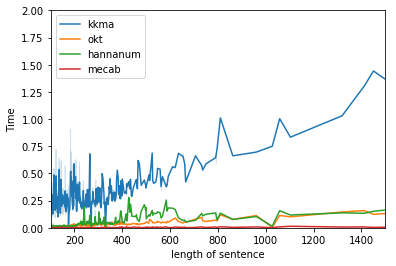

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.lineplot(*zip(*performance['kkma']),label='kkma')
sns.lineplot(*zip(*performance['okt']),label='okt')
sns.lineplot(*zip(*performance['Hannanum']),label='hannanum')
sns.lineplot(*zip(*performance['Mecab']),label='mecab')
ax.set_xlim(100,1500)
ax.set_ylim(0,2)
ax.set(xlabel='length of sentence', ylabel='Time')
plt.savefig('./performance.png')

## 형태소분석기 품질

In [39]:
test_sent='남는게 없다\n소스사서 외우면 끝\n영어잘하면 개꿀\n기말은 점수 높게나와서\n중간이 중요'
print('sample sentence :',test_sent,'\n')
print('==형태소 분석기별 결과==\n')
for i in set_tokenizer:
    print(i[0],i[1].pos(test_sent))

sample sentence : 남는게 없다
소스사서 외우면 끝
영어잘하면 개꿀
기말은 점수 높게나와서
중간이 중요 

==형태소 분석기별 결과==

kkma [('남', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('없', 'VA'), ('다', 'ECS'), ('소스', 'NNG'), ('사서', 'NNG'), ('외우', 'VV'), ('면', 'ECE'), ('끝', 'NNG'), ('영어', 'NNG'), ('잘하', 'VV'), ('면', 'ECE'), ('개꿀', 'NNG'), ('기말', 'NNG'), ('은', 'JX'), ('점수', 'NNG'), ('높', 'VA'), ('게', 'ECD'), ('나오', 'VV'), ('아서', 'ECD'), ('중간', 'NNG'), ('이', 'JKS'), ('중요', 'NNG')]
okt [('남는게', 'Verb'), ('없다', 'Adjective'), ('\n', 'Foreign'), ('소스', 'Noun'), ('사서', 'Noun'), ('외우면', 'Verb'), ('끝', 'Noun'), ('\n', 'Foreign'), ('영어', 'Noun'), ('잘', 'VerbPrefix'), ('하면', 'Verb'), ('개꿀', 'Noun'), ('\n', 'Foreign'), ('기', 'Modifier'), ('말', 'Noun'), ('은', 'Josa'), ('점수', 'Noun'), ('높게', 'Adjective'), ('나와서', 'Verb'), ('\n', 'Foreign'), ('중간', 'Noun'), ('이', 'Josa'), ('중요', 'Noun')]
Hannanum [('남', 'P'), ('는게', 'E'), ('없', 'P'), ('다', 'E'), ('소스사서', 'N'), ('외우', 'P'), ('면', 'E'), ('끝', 'N'), ('영어잘하', 'N'), ('이', 'J'), ('면', 'E'), ('개

In [50]:
# a=[]
# for i in trial[0]:
#     a.append(i.split(' '))
# model = gensim.models.Word2Vec(min_count=1)
# model.build_vocab(a)
# model.train(a,total_examples=model.corpus_count,epochs=1)

(155, 227)